In [1]:
# importing libraries
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# import dataset
df =pd.read_csv("CAR DETAILS FROM CAR DEKHO.CSV")

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.shape

(4340, 8)

In [7]:
# finding unique values
print(df['seller_type'].unique())
print(df['fuel'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())

['Individual' 'Dealer' 'Trustmark Dealer']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [8]:
##check missing values
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [9]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [11]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [15]:
final_df=df[['year','selling_price','km_driven','fuel','seller_type','transmission','owner']]

In [21]:
final_df["current_year"]=2023

In [22]:
final_df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,no_year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2023,13
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2023,13
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2023,8
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2023,3
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2023,6


In [23]:
final_df['no_year']=final_df['current_year']- final_df['year']

In [24]:
final_df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,no_year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2023,16
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2023,16
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2023,11
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2023,6
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2023,9


In [27]:
final_df.drop(["year"],axis=1, inplace=True)

In [29]:
final_df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,no_year
0,60000,70000,Petrol,Individual,Manual,First Owner,2023,16
1,135000,50000,Petrol,Individual,Manual,First Owner,2023,16
2,600000,100000,Diesel,Individual,Manual,First Owner,2023,11
3,250000,46000,Petrol,Individual,Manual,First Owner,2023,6
4,450000,141000,Diesel,Individual,Manual,Second Owner,2023,9


In [30]:
final_df.drop(["current_year"],axis=1, inplace=True)

In [31]:
final_df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,no_year
0,60000,70000,Petrol,Individual,Manual,First Owner,16
1,135000,50000,Petrol,Individual,Manual,First Owner,16
2,600000,100000,Diesel,Individual,Manual,First Owner,11
3,250000,46000,Petrol,Individual,Manual,First Owner,6
4,450000,141000,Diesel,Individual,Manual,Second Owner,9


In [32]:
final_df=pd.get_dummies(final_df,drop_first=True)

In [33]:
final_df.head()

,selling_price,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,16,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,16,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,11,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,6,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,9,1,0,0,0,1,0,1,0,1,0,0


In [ ]:
final_df.drop(['fuel_Electric'], axis=1, inplace=True)
final_df.drop(['fuel_LPG'], axis=1, inplace=True)

In [34]:
final_df.corr()

,selling_price,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
selling_price,1.000000,-0.192289,-0.413922,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,0.110176,-0.530205,-0.078725,-0.161986,0.048799,-0.111326
km_driven,-0.192289,1.000000,0.419688,0.285396,-0.001372,0.036652,-0.291139,0.182663,-0.089858,0.120226,0.097349,0.195203,-0.083445,0.194713
no_year,-0.413922,0.419688,1.000000,-0.121424,0.025540,0.051266,0.114908,0.173703,-0.100225,0.143800,0.186361,0.292349,-0.095795,0.244308
fuel_Diesel,0.282947,0.285396,-0.121424,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098,-0.021054,0.003524,-0.010575,0.009373
fuel_Electric,-0.005095,-0.001372,0.025540,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746,-0.002094,0.025960,-0.000952,-0.004166
fuel_LPG,-0.042434,0.036652,0.051266,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764,0.013384,0.030141,-0.004577,0.004836
fuel_Petrol,-0.269453,-0.291139,0.114908,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614,0.011502,-0.012717,0.012427,-0.008502
seller_type_Individual,-0.236798,0.182663,0.173703,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163,0.072322,0.186573,-0.107886,0.140823
seller_type_Trustmark Dealer,0.110176,-0.089858,-0.100225,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346,-0.021395,-0.076764,-0.009729,-0.042578
transmission_Manual,-0.530205,0.120226,0.143800,-0.048098,-0.044746,0.024764,0.039614,0.214163,-0.042346,1.000000,0.035597,0.068068,0.009152,0.030802


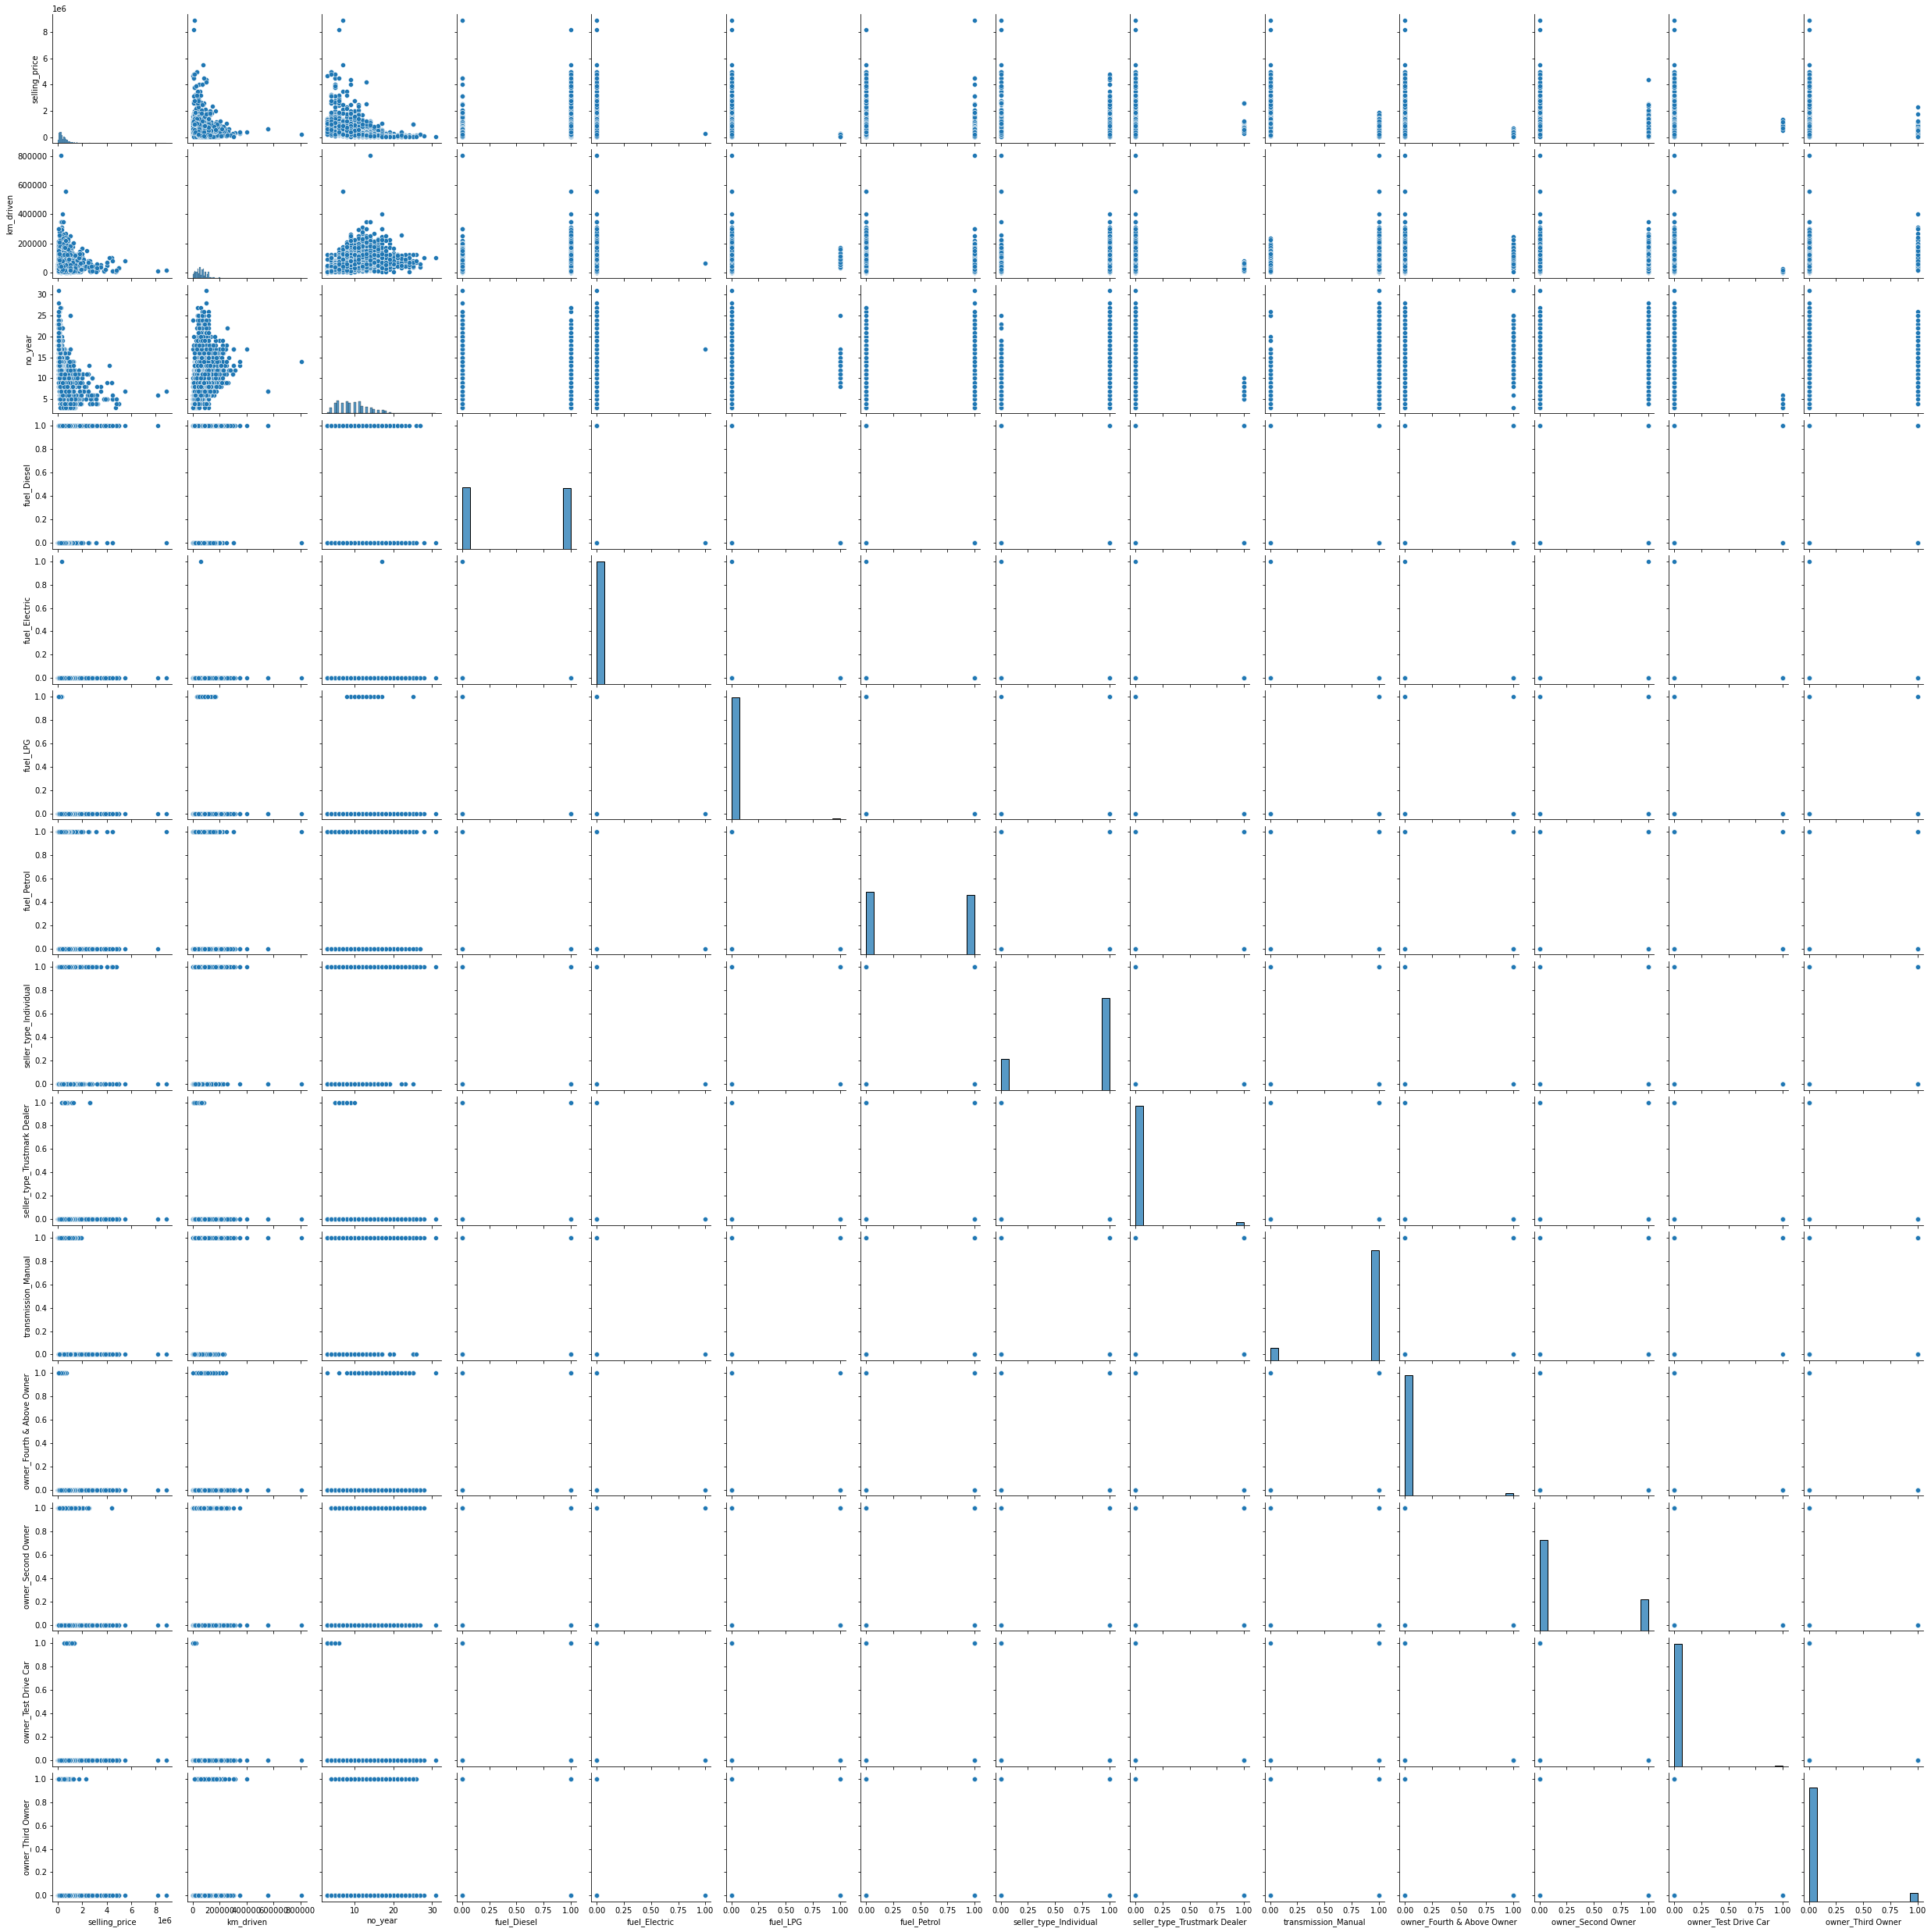

In [36]:
sns.pairplot(final_df)

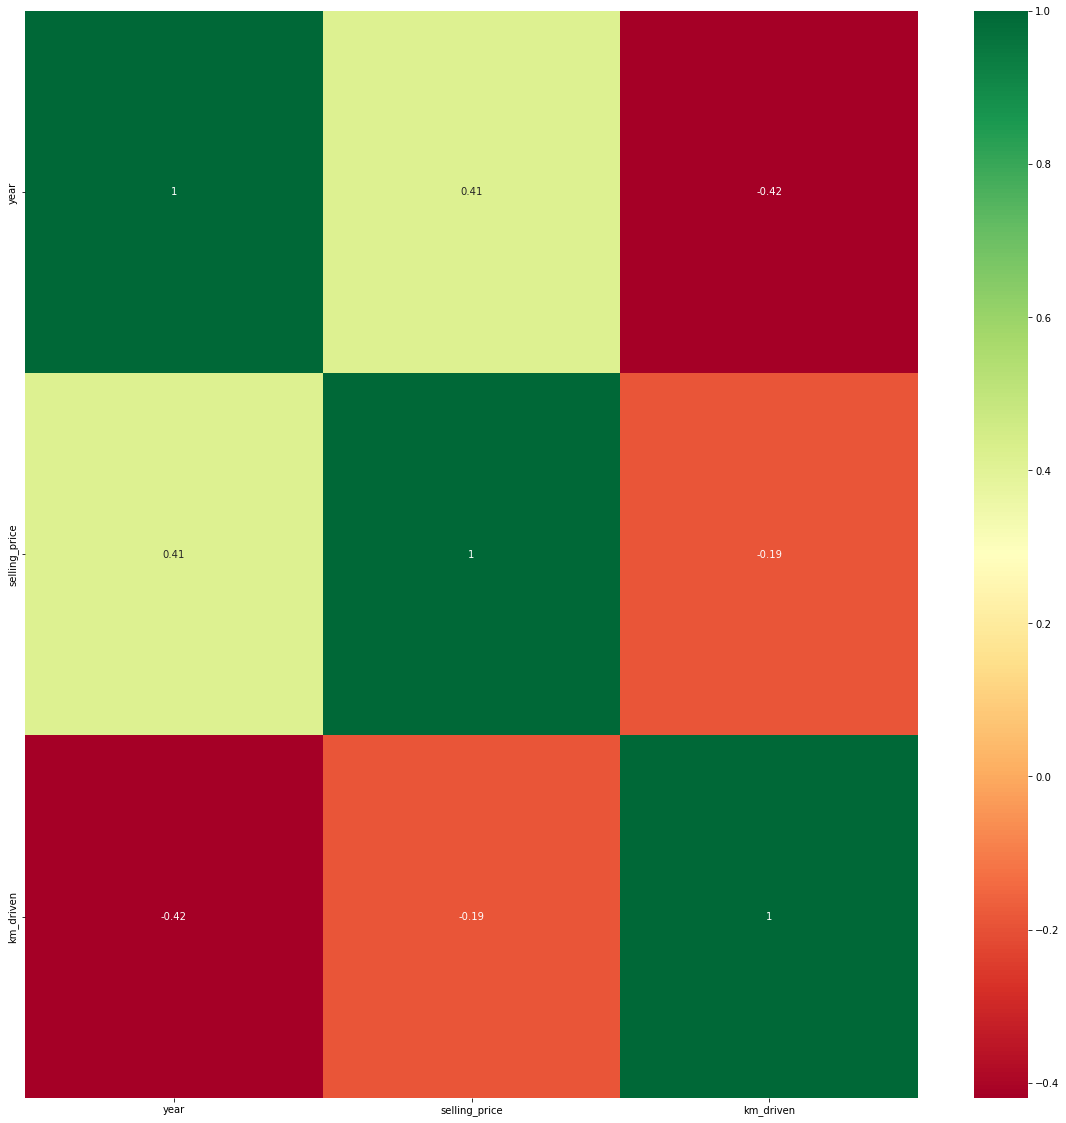

In [37]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [41]:
X=final_df.iloc[:,1:]
y=final_df.iloc[:,0]


In [42]:
X.head()

,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,70000,16,0,0,0,1,1,0,1,0,0,0,0
1,50000,16,0,0,0,1,1,0,1,0,0,0,0
2,100000,11,1,0,0,0,1,0,1,0,0,0,0
3,46000,6,0,0,0,1,1,0,1,0,0,0,0
4,141000,9,1,0,0,0,1,0,1,0,1,0,0


In [43]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [44]:
print(model.feature_importances_)

[2.48524728e-01 2.44312016e-01 1.29812441e-01 3.22060653e-05
 2.34677938e-05 2.02280269e-04 4.77620228e-02 8.65933532e-03
 2.92828380e-01 8.44198257e-04 2.22954433e-02 7.54928074e-04
 3.94855251e-03]


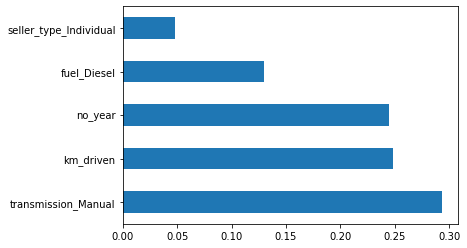

In [45]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.ensemble import RandomForestRegressor

regressor=RandomForestRegressor()

In [47]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [48]:
from sklearn.model_selection import RandomizedSearchCV

In [49]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [50]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [51]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [61]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions =random_grid, scoring ='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs=1)
                                                                      
                                                                      
                                                                      
                                                                      
                                                                      
                                                                      
                                                                      
    

In [62]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [63]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

In [64]:
rf_random.best_score_

-128911673739.86504

In [65]:
predictions=rf_random.predict(X_test)

C:\Users\SAI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

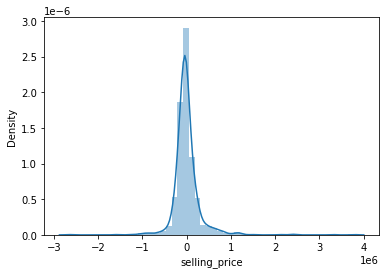

In [66]:
sns.distplot(y_test-predictions)
